In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [37]:
sep_coins = cv2.imread('data/pennies.jpg')

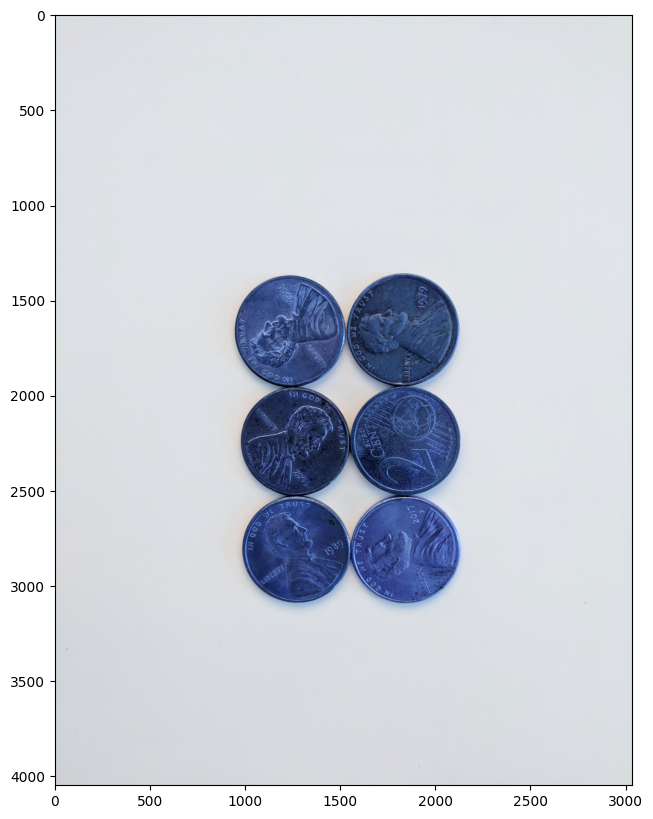

In [38]:
display(sep_coins)

In [39]:
sep_blur = cv2.medianBlur(sep_coins, 35)

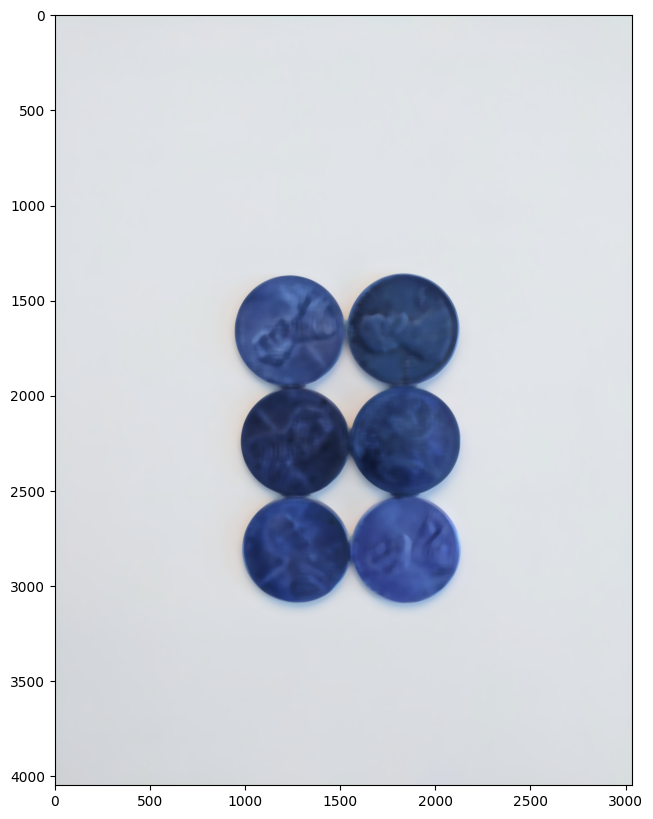

In [40]:
display(sep_blur)

In [41]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

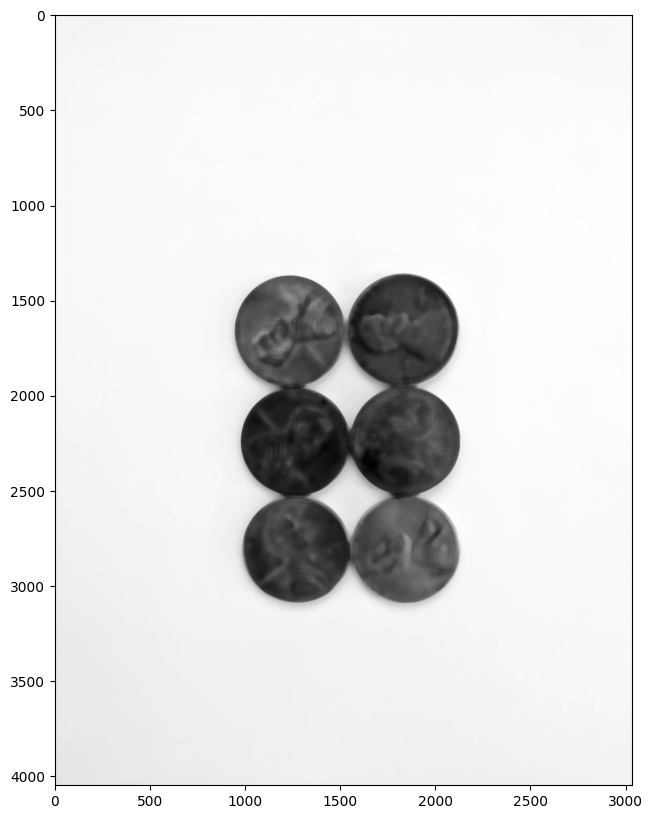

In [42]:
display(gray_sep_coins)

In [43]:
ret, thresh_coins = cv2.threshold(gray_sep_coins, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

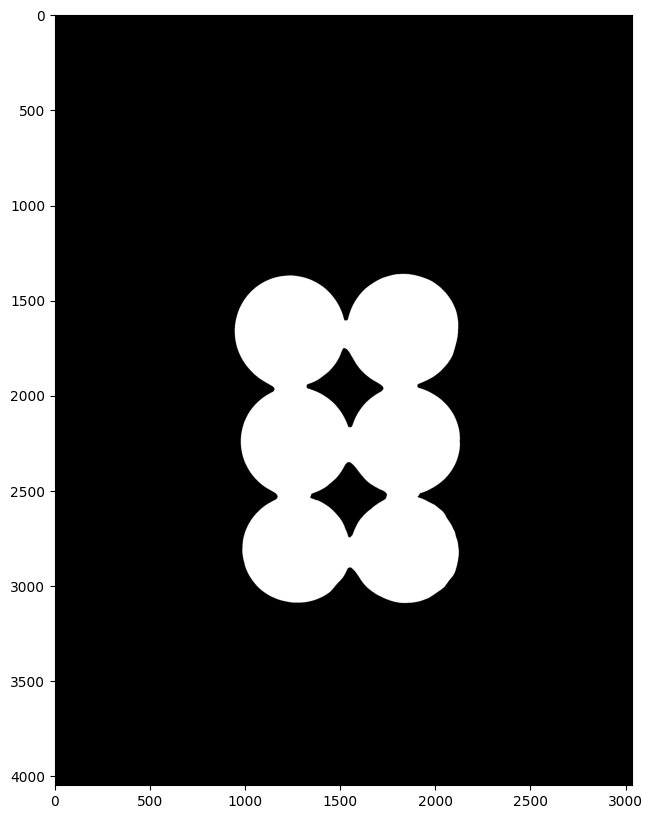

In [44]:
display(thresh_coins)

In [45]:
dist_trans = cv2.distanceTransform(thresh_coins, cv2.DIST_L2, 5)

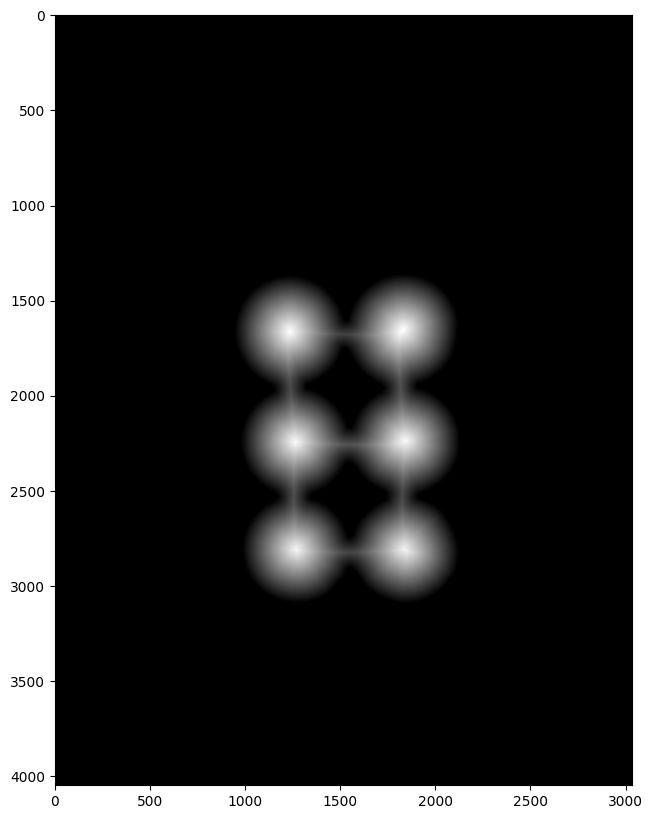

In [46]:
display(dist_trans)

In [54]:
ret, dist_trans_thresh = cv2.threshold(dist_trans, 0.7*dist_trans.max(), 255, cv2.THRESH_BINARY)

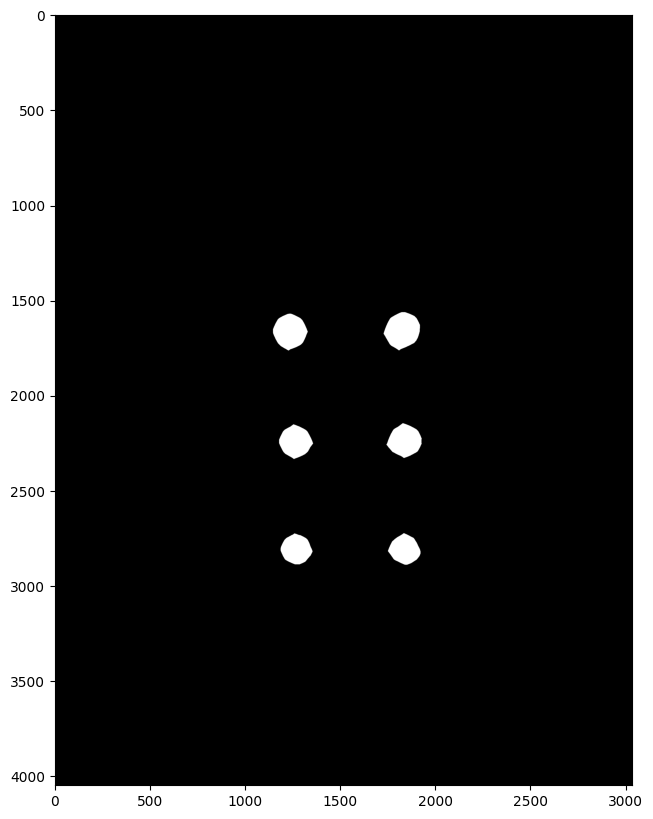

In [55]:
display(dist_trans_thresh)

In [68]:
diff_thresh = cv2.subtract(sure, dist_trans_thresh, dtype=cv2.CV_8UC1)

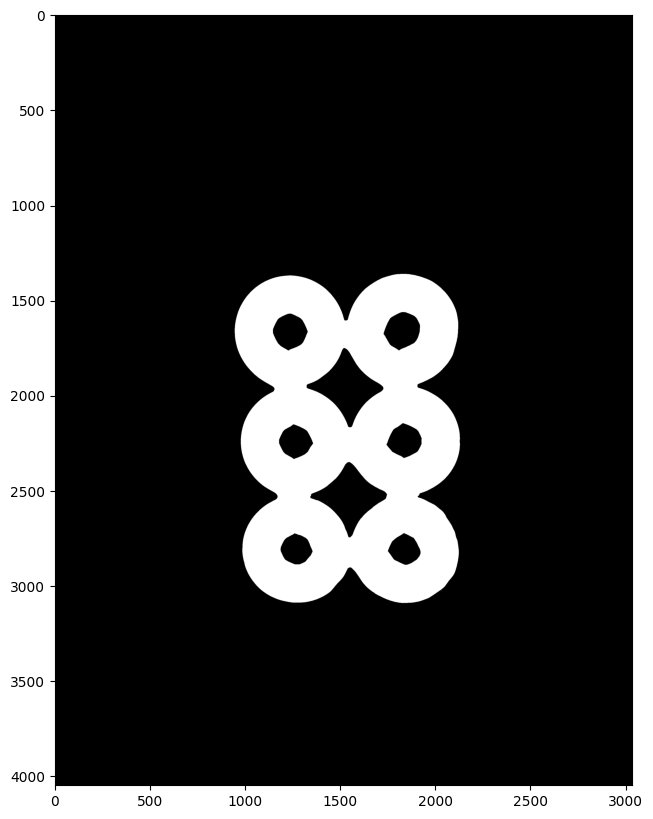

In [60]:
display(diff_thresh)

In [70]:
sure_fg = np.uint8(dist_trans_thresh)
ret, components = cv2.connectedComponents(sure_fg)

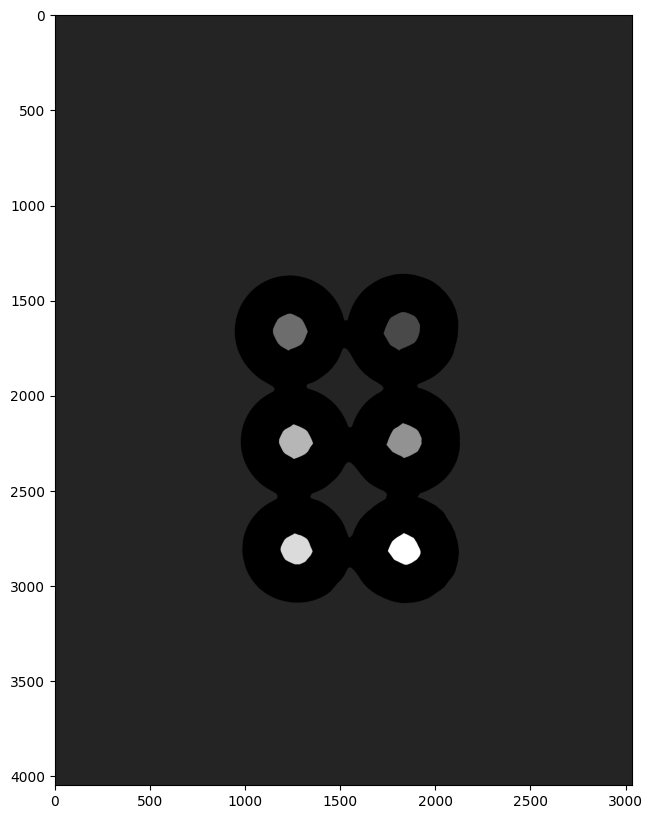

In [71]:
components = components + 1
components[diff_thresh==255] = 0
display(components, cmap='gray')